<a href="https://colab.research.google.com/github/kartikdangi/Algo_DS_Questions-/blob/master/ML_Analysis_Flow_Cytometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting files from gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Installing fscparser to parse fcs files

!pip install fcsparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.0 MB 7.2 MB/s 


In [3]:
!unzip FCM\ Data\ for\ Kartik.zip

unzip:  cannot find or open FCM Data for Kartik.zip, FCM Data for Kartik.zip.zip or FCM Data for Kartik.zip.ZIP.


In [4]:
cd gdrive/MyDrive/FCM\ Data\ for\ Kartik

/content/gdrive/MyDrive/FCM Data for Kartik


## **Abbreviations for components of FCS filenames:**



> 




*   C: Combination of Spectinomycin and Tetracycline antibiotics
*   S: Spectinomycin
*   T: Tetracycline
*   H: High Concentration
*   M: Medium Concentration
*   L: Low Concentration
*   NC: Negative control
*   PC: Positive Control
*   IND0: Inoculum on Day 0
*   D1, D2, D3, D4, D5: Days 1 to 5
*   1, 2, 3: Triplicates of each sample













In [5]:
#Importing Libraries

import fcsparser as fcsp
import re
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, ParameterGrid, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, confusion_matrix
from sklearn.decomposition import PCA

import random

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [54]:
# Importing data

def load_data(dir):
    print('---- loading data ---->')
    data = {}
    for dirname, _, filename in os.walk(dir):
        for file in filename:
            path = os.path.join(dirname, file)
            # Slicing in order to remove .fcs from filename
            f_name = ''.join(list(file)[:-4])
            data[f_name] = pd.DataFrame(fcsp.parse(path, meta_data_only=False, reformat_meta=True)[1])
    return data, fcsp.parse(path, meta_data_only=False, reformat_meta=True)[0]['_channels_']
 

'''
for dirname, _, filename in os.walk(HERE):
    for file in filename:
      path = os.path.join()
        meta = fcsparser.parse(, meta_data_only=True, reformat_meta=True)
'''

def prepData(x,scaler=None):
        """
        Normalize data
        """
        if not scaler:
                scaler = StandardScaler().fit(x)
        x_transformed= np.nan_to_num(np.array(scaler.transform(x)))
        return x_transformed,scaler

# Function to return list of different taken samples
def sample_list(det = data):
    return set([sample[0:3] for sample in det.keys()])


# Function to check the dimensions of our fcs files
def checkDimensions(data, dimensions):
    for sample in data:
        if data[sample].shape != dimensions: print(sample, data[sample].shape)
    return 



In [55]:
# Filtering FCS files with improper dimensions

checkDimensions(data, data[random.choice(list(data.keys()))].shape)

CMD4_1 (99906, 12)
SHD1_2 (100021, 12)
SHD2_3 (99670, 12)
TMD4_2 (100094, 12)


# Exploratory Data Analysis:


In [8]:
# Loading fcs file data into a dictionary
global path

dir = os.path.abspath(os.path.dirname('./CHD1_1.fcs'))
data, channels = load_data(dir)

print('First five rows of sample fcs file -->')
random_sample = random.choice(list(data.keys()))
random_fcs_sample = data[random_sample]
random_fcs_sample.head()


---- loading data ---->
First five rows of sample fcs file -->


,FSC-A,FSC-H,SSC-A,FITC-A,PE-A,PE-Cy5-A,PE-Cy7-A,APC-A,APC-Cy7-A,Pacific Blue-A,AmCyan-A,Time
0,239.199997,676.0,518.760010,-193.050003,391.050018,72.270004,-50.490002,196.000000,90.400002,-1.090000,65.400002,54.000000
1,162.400009,674.0,809.820007,-67.320000,-785.070007,-13.860001,-27.720001,227.199997,100.800003,-323.730011,-20.710001,54.000000
2,1434.400024,1752.0,3487.770020,414.809998,172.259995,50.490002,-35.639999,-385.600006,-78.400002,29204.371094,29134.611328,54.099998
3,445.600006,931.0,3984.750000,189.089996,-68.309998,-31.680000,-3.960000,-24.800001,-4.000000,7381.480469,6815.770020,54.099998
4,341.600006,779.0,806.850037,91.080002,436.589996,-8.910000,-43.560001,474.399994,47.200001,-55.590000,50.140003,54.099998


In [11]:
# Printing Channels present in each fcs file
channels

,$PnN,$PnR,$PnB,$PnE,$PnV,$PnG
Channel Number,,,,,,
1,FSC-A,262144,32,"[0, 0]",478,1.0
2,FSC-H,262144,32,"[0, 0]",478,1.0
3,SSC-A,262144,32,"[0, 0]",324,1.0
4,FITC-A,262144,32,"[0, 0]",610,1.0
5,PE-A,262144,32,"[0, 0]",637,1.0
6,PE-Cy5-A,262144,32,"[0, 0]",606,1.0
7,PE-Cy7-A,262144,32,"[0, 0]",775,1.0
8,APC-A,262144,32,"[0, 0]",833,1.0
9,APC-Cy7-A,262144,32,"[0, 0]",715,1.0


In [12]:
# Checking for NaN values in each of the fcs files
[print(data[key].isnull().sum(),) for key in data.keys()]

FSC-A             0
FSC-H             0
SSC-A             0
FITC-A            0
PE-A              0
PE-Cy5-A          0
PE-Cy7-A          0
APC-A             0
APC-Cy7-A         0
Pacific Blue-A    0
AmCyan-A          0
Time              0
dtype: int64
FSC-A             0
FSC-H             0
SSC-A             0
FITC-A            0
PE-A              0
PE-Cy5-A          0
PE-Cy7-A          0
APC-A             0
APC-Cy7-A         0
Pacific Blue-A    0
AmCyan-A          0
Time              0
dtype: int64
FSC-A             0
FSC-H             0
SSC-A             0
FITC-A            0
PE-A              0
PE-Cy5-A          0
PE-Cy7-A          0
APC-A             0
APC-Cy7-A         0
Pacific Blue-A    0
AmCyan-A          0
Time              0
dtype: int64
FSC-A             0
FSC-H             0
SSC-A             0
FITC-A            0
PE-A              0
PE-Cy5-A          0
PE-Cy7-A          0
APC-A             0
APC-Cy7-A         0
Pacific Blue-A    0
AmCyan-A          0
Time              0
d

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [13]:
# Printing available features in each of the fcs file -->

features = random_fcs_sample.columns
print('Features in each fcs file : {}'.format(', '.join(features)))

Features in each fcs file : FSC-A, FSC-H, SSC-A, FITC-A, PE-A, PE-Cy5-A, PE-Cy7-A, APC-A, APC-Cy7-A, Pacific Blue-A, AmCyan-A, Time


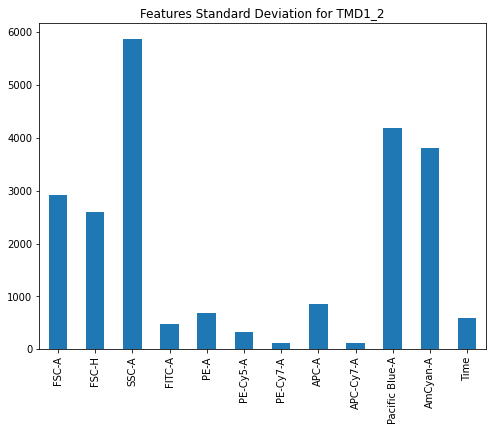

In [14]:
# Plotting and comparing the standard deviation of each of the input features:

random_fcs_sample[features].std().plot(kind='bar', figsize=(8,6), title=f"Features Standard Deviation for {random_sample}")

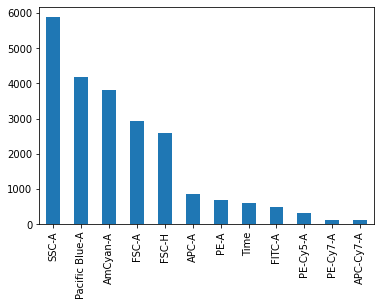

In [15]:
# Plotting the hist data in non-increasing order 
features_highest_variance = random_fcs_sample[features].std().sort_values(ascending=False)
features_highest_variance.plot(kind = 'bar')

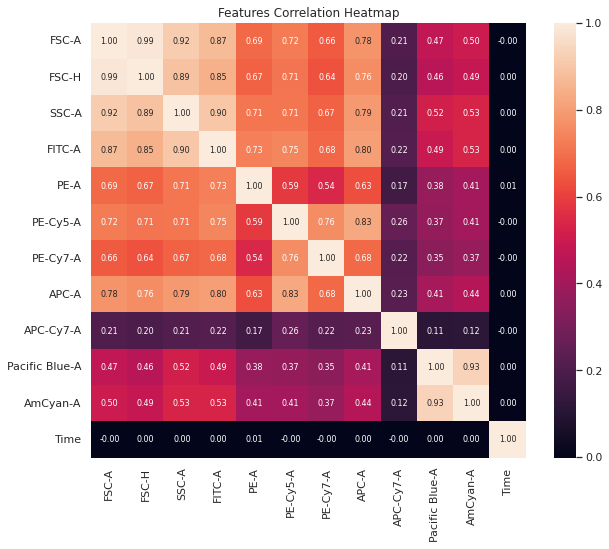

In [16]:
cm = np.corrcoef(random_fcs_sample[features].values.T)
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=features, xticklabels=features)
plt.title('Features Correlation Heatmap')
plt.show()

There is a very high correlation (> 0.6) between some features which could hurt the performance of some ML algorithms.

So, some of the above features will be target for removal in feature selection

Usually, we take only three features, which are FSC-A,  SSC-A and AmCyan-A

In [40]:
deta['TMD4']

,FSC-A,FSC-H,SSC-A,FITC-A,PE-A,PE-Cy5-A,PE-Cy7-A,APC-A,APC-Cy7-A,Pacific Blue-A,AmCyan-A,Time
0,1321.599976,1018.0,1536.479980,-12.870000,-473.220001,-21.780001,7.920000,-144.000000,-2.400000,7190.729980,6578.150391,52.200001
1,559.200012,781.0,858.330017,-5.940000,-247.500000,-5.940000,-30.690001,221.600006,-14.400001,-51.230003,150.419998,52.200001
2,604.000000,726.0,1143.449951,-187.110001,137.610001,87.120003,-4.950000,-283.200012,170.400009,253.970001,322.640015,52.200001
3,295.200012,750.0,499.950012,22.770000,-44.549999,54.450001,2.970000,-284.000000,-4.000000,-94.830002,-5.450000,52.200001
4,397.600006,735.0,1253.339966,287.100006,452.429993,3.960000,-27.720001,-89.599998,-73.599998,447.990021,364.059998,52.200001
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,900.799988,846.0,375.209991,42.570000,6.930000,-23.760000,-40.590000,200.000000,-75.200005,-100.280006,-47.960003,2378.899902
99996,1116.800049,981.0,582.119995,133.649994,222.750000,-36.630001,-58.410000,-346.399994,76.800003,148.240005,-8.720000,2378.899902
99997,1132.800049,950.0,575.190002,46.529999,-54.450001,7.920000,-29.700001,397.600006,-57.600002,-83.930000,35.970001,2378.899902
99998,1269.599976,1218.0,4514.399902,527.669983,-977.130005,0.000000,-54.450001,-140.000000,11.200000,6392.850098,6022.250000,2378.899902


# Scatter/Dot Plots:

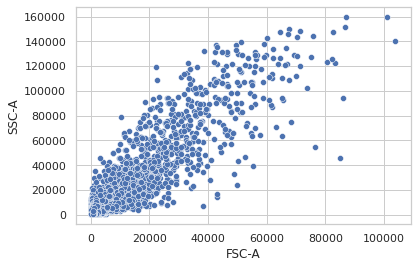

In [17]:
sns.set(style='whitegrid')
sns.scatterplot(x='FSC-A',y='SSC-A',data=random_fcs_sample)

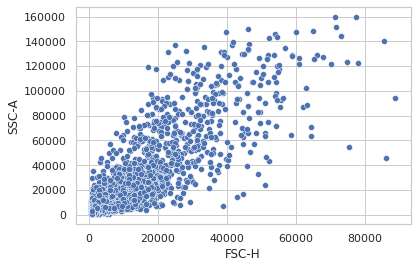

In [18]:
sns.set(style='whitegrid')
sns.scatterplot(x='FSC-H',y='SSC-A',data=random_fcs_sample)

# Histogram:

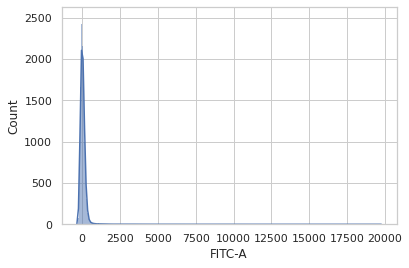

In [19]:
sns.histplot(random_fcs_sample['FITC-A'],kde='False')

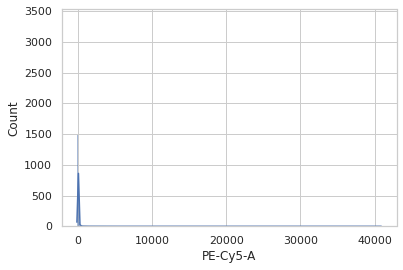

In [20]:
sns.histplot(random_fcs_sample['PE-Cy5-A'],kde='False')

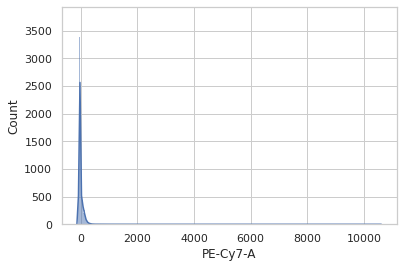

In [21]:
sns.histplot(random_fcs_sample['PE-Cy7-A'],kde='False')

# Contour Plots:

ValueError: ignored

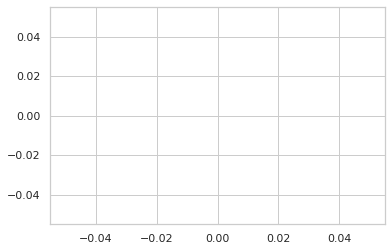

In [22]:
sns.kdeplot(x='FSC-A',y='SSC-A',data=random_fcs_sample)
plt.figure(figsize=(25,25))

In [ ]:
sns.kdeplot(x='FSC-A',y='AmCyan-A',data=random_fcs_sample)
plt.figure(figsize=(25,25))

In [37]:
#concatenating the dataframes of all triplicates -->
def tot_sample(data = data):
  deta = {}
  for key in data.keys():
      deta[key[:4]]= pd.concat([data[key[:4]+'_1'],data[key[:4]+'_2'],data[key[:4]+'_3']],axis=0)
  return deta

tot_sample()

{'CHD1':              FSC-A   FSC-H        SSC-A      FITC-A        PE-A     PE-Cy5-A  \
 0        96.800003   995.0  1552.320068    2.970000   63.360001    70.290001   
 1       252.800003   707.0  1641.420044   87.120003   38.610001    59.400002   
 2       248.000000   791.0  1152.359985  -89.099998 -523.710022     1.980000   
 3       229.600006   827.0   708.840027   58.410000    1.980000    39.599998   
 4       289.600006   800.0  1036.530029   26.730000 -621.720032    53.459999   
 ...            ...     ...          ...         ...         ...          ...   
 99995   453.600006   691.0  1041.479980  133.649994  -63.360001   -45.540001   
 99996   358.399994   816.0  1626.570068  -47.520000  146.520004  1256.310059   
 99997  2806.400146  2898.0  1939.410034   -4.950000  331.649994   -33.660000   
 99998   798.400024  1623.0  1729.530029 -180.180008 -955.350037    10.890000   
 99999   368.000000   738.0  1073.160034   76.230003 -200.970001   -13.860001   
 
          PE-Cy7-A

In [61]:
pca  = PCA(3)
deta = data
df = pca.fit_transform(deta[random_sample])
df.shape


(100000, 3)

In [25]:
data.keys()

dict_keys(['CHD5_2', 'CLD1_2', 'CHD2_1', 'CHD4_2', 'CLD2_1', 'CHD1_3', 'CHD4_3', 'CHD2_2', 'CHD5_1', 'CLD1_3', 'CHD4_1', 'CHD3_1', 'CHD1_2', 'CHD2_3', 'CHD1_1', 'CHD3_2', 'CHD3_3', 'CHD5_3', 'CLD1_1', 'TMD5_3', 'CLD4_2', 'CMD3_2', 'CMD4_3', 'CLD3_3', 'CMD2_2', 'CLD4_3', 'CMD1_1', 'CLD5_3', 'CMD2_3', 'IND0_2', 'CMD1_2', 'CMD2_1', 'CMD5_3', 'CLD4_1', 'CLD5_1', 'CLD3_1', 'CLD3_2', 'CMD5_2', 'CMD4_1', 'CMD3_1', 'CMD3_3', 'CMD5_1', 'IND0_1', 'CMD4_2', 'CLD2_3', 'CLD5_2', 'CMD1_3', 'CLD2_2', 'PCD3_2', 'PCD4_1', 'NCD1_1', 'NCD1_2', 'PCD1_1', 'PCD4_2', 'PCD2_2', 'NCD5_2', 'NCD5_3', 'NCD2_1', 'NCD2_2', 'IND0_3', 'PCD2_3', 'NCD5_1', 'PCD2_1', 'NCD3_2', 'PCD3_1', 'NCD4_3', 'NCD1_3', 'PCD4_3', 'NCD4_2', 'NCD3_1', 'NCD4_1', 'PCD1_2', 'NCD2_3', 'NCD3_3', 'PCD3_3', 'PCD1_3', 'SLD2_3', 'SHD5_2', 'SLD1_3', 'SHD2_1', 'PCD5_3', 'SLD2_1', 'SLD2_2', 'PCD5_1', 'SLD4_1', 'SLD3_2', 'SLD5_2', 'SHD4_3', 'SLD3_1', 'SHD3_3', 'SHD4_2', 'SHD3_1', 'SHD5_3', 'SLD1_2', 'SHD5_1', 'SHD1_3', 'SLD3_3', 'SLD5_1', 'SLD1_1',

In [26]:
# Data Cleaning 

Day_1 = dict([(key,data[key]) for key in data.keys() if key.endswith('_1')])
Day_1.keys()

dict_keys(['CHD2_1', 'CLD2_1', 'CHD5_1', 'CHD4_1', 'CHD3_1', 'CHD1_1', 'CLD1_1', 'CMD1_1', 'CMD2_1', 'CLD4_1', 'CLD5_1', 'CLD3_1', 'CMD4_1', 'CMD3_1', 'CMD5_1', 'IND0_1', 'PCD4_1', 'NCD1_1', 'PCD1_1', 'NCD2_1', 'NCD5_1', 'PCD2_1', 'PCD3_1', 'NCD3_1', 'NCD4_1', 'SHD2_1', 'SLD2_1', 'PCD5_1', 'SLD4_1', 'SLD3_1', 'SHD3_1', 'SHD5_1', 'SLD5_1', 'SLD1_1', 'SHD1_1', 'SHD4_1', 'SMD1_1', 'SMD4_1', 'SMD2_1', 'THD2_1', 'THD4_1', 'SMD3_1', 'THD5_1', 'THD3_1', 'THD1_1', 'SMD5_1', 'TMD4_1', 'TLD3_1', 'TMD5_1', 'TLD2_1', 'TLD4_1', 'TMD3_1', 'TLD5_1', 'TMD1_1', 'TLD1_1', 'TMD2_1'])

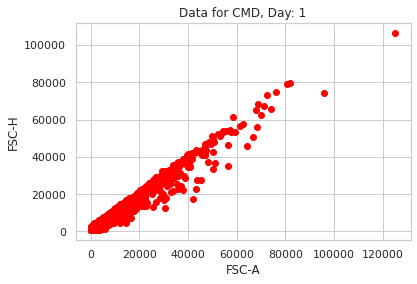

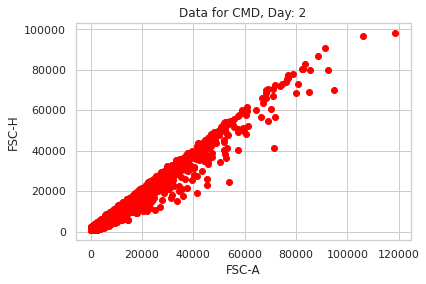

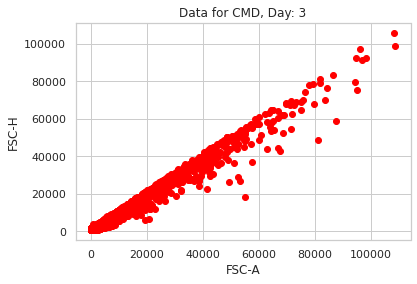

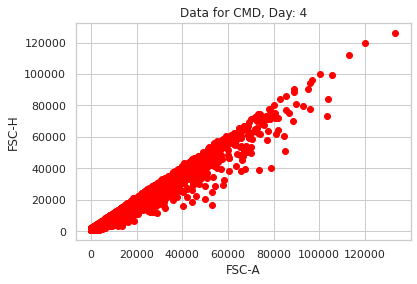

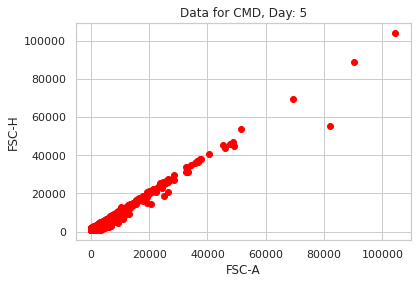

[None, None, None, None, None]

In [27]:
# Data Presentation

def plot_sample_data(data, key, day = 1):
    key = key[:3]
    plot = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)])
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('FSC-H')
    plt.title(f'Data for {key}, Day: {day}')
    plt.show()
    

[plot_sample_data(data, 'CMD',i) for i in range(1,6)]

(1499906, 12)


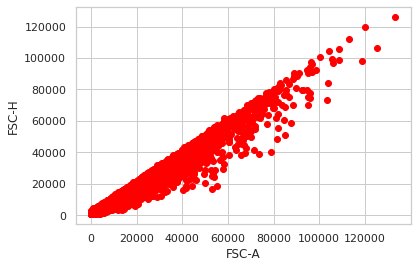

In [33]:

def plot_sample(data, key):
    key = key[:3]
    original = pd.DataFrame()
    for day in range(1,6):
        l = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)], axis = 0)
        original = pd.concat([original, l])
    plot = original
    print(plot.shape)
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('FSC-H')
    plt.show()

plot_sample(data,'CMD')

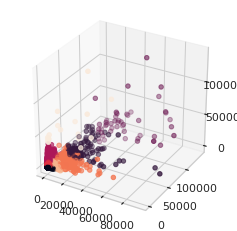

'\n#plotting the results\nplt.scatter(filtered_label0[:,0] , filtered_label0[:,1])\nplt.show()\n'

In [34]:
# Running Clustering with feature vector of size 3 in place of 3000 feature vector

num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(sample['FSC-A'],sample['SSC-A'],sample['AmCyan-A'],c = klabels) 

plt.show()


'''
plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()
'''

In [ ]:
# PCA for clustering -->

In [67]:
# K - means clustering with 3000 feature vector for all triplicates for one day -->

# tot_sample contains df with triplicates data in single df for each of the samples from d1 to d5
deta = tot_sample()

def k_means(num_clusters = 8, data = deta, samp = random.choice(list(deta.keys()))):
    sample = data[samp][['FSC-A','SSC-A','AmCyan-A']]
    sample_vectors = np.array([[]])
    for i in range(300):
      vector = sample.sample(n = 1000).to_numpy().flatten()
      sample_vectors = np.append(sample_vectors, [vector])
    sample_vectors = np.reshape(sample_vectors, (300,3000))
    kmean = KMeans(n_clusters = num_clusters).fit(sample_vectors)
    kmean.predict(sample_vectors)
    labels = kmean.labels_

    #filter rows of original data

    cluster_count = np.zeros(num_clusters)
    for cluster in range(num_clusters):
        filter_lb = sum(labels == cluster)
        cluster_count[cluster] = filter_lb

    lb = [samp + '-' + str(label) for label in labels]
    return sample_vectors, lb
vectors, labels = k_means(data = deta)

vector_df = pd.DataFrame(vectors)
print(set(labels))




{'SLD2-6', 'SLD2-2', 'SLD2-5', 'SLD2-7', 'SLD2-4', 'SLD2-0', 'SLD2-1', 'SLD2-3'}


In [80]:
# deta2 is a dictionary with each column containing all the events from d1 to d5 of triplicates combined 

deta2 = {}
for key in deta.keys():
    try:
      deta2[key[:-2]] = pd.concat([deta[key[:-2] + 'D' + str(i)] for i in range(1,6)])
    except KeyError:
      deta2[key] = deta[key]

for key in deta2.keys():
  print(key, deta2[key].shape)

CH (1500000, 12)
CL (1500000, 12)
TM (1500094, 12)
CM (1499906, 12)
IND0 (300000, 12)
PC (1500000, 12)
NC (1500000, 12)
SL (1500000, 12)
SH (1499691, 12)
TH (1500000, 12)
SM (1500000, 12)
TL (1500000, 12)


In [84]:
# K - means clustering with 3000 feature vector for all triplicates for all day1 to day5 -->

def k_means(num_clusters = 8, data = deta2, samp = random.choice(list(deta2.keys())), to_sample = 300):
    sample = data[samp][['FSC-A','SSC-A','AmCyan-A']]
    sample_vectors = np.array([[]])
    for i in range(to_sample):
      vector = sample.sample(n = 1000).to_numpy().flatten()
      sample_vectors = np.append(sample_vectors, [vector])
    sample_vectors = np.reshape(sample_vectors, (300,3000))
    kmean = KMeans(n_clusters = num_clusters).fit(sample_vectors)
    kmean.predict(sample_vectors)
    labels = kmean.labels_

    lb = [samp + '-' + str(label) for label in labels]
    return sample_vectors, lb


a,b = k_means()
print(pd.DataFrame(a),b)


            0            1            2            3            4     \
0    1984.000000  2288.880127   528.650024   449.600006   607.859985   
1     594.400024   535.590027    26.160000   962.400024   601.919983   
2     533.600037   495.000000   -10.900001  2281.600098  6631.020020   
3     662.400024  2095.830078  8058.370117   600.799988   522.720032   
4     539.200012   707.850037   -70.849998   130.400009   392.040009   
..           ...          ...          ...          ...          ...   
295   504.000000   775.169983   325.910004   778.400024   676.169983   
296   360.800018   419.760010   -10.900001   764.000000   581.130005   
297   153.600006   523.710022     6.540000   126.400002   819.720032   
298   580.799988   848.429993   -32.700001   643.200012   449.459991   
299   383.200012   863.280029    59.950001   197.600006   872.190002   

            5            6           7            8            9     ...  \
0      64.310005   110.400002  490.050018    68.670006  239

In [ ]:
final_df = pd.DataFrame()
for key in deta2.keys():
  if key!='IND0' :
    v,lb = k_means(data = deta2, samp = key)
    p = pd.DataFrame(v)
    p['labels'] = lb
    final_df = pd.concat([final_df,p], axis = 0)

In [ ]:
final_df.shape

# Clustering:

### Using KMeans on Combined Vector Dataset of 1500 vectors from each sample:

In [70]:
# Vector Dataset Creation
pre_final_df = pd.DataFrame() 
for key in deta.keys():
  key = key[:-2]
  try:
    pre_final_df[key] = pd.concat([deta[key + 'D' + str(i)] for i in range(1,6)])
  except KeyError:
    pre_final

KeyError: ignored

In [72]:
deta['IND0']

,FSC-A,FSC-H,SSC-A,FITC-A,PE-A,PE-Cy5-A,PE-Cy7-A,APC-A,APC-Cy7-A,Pacific Blue-A,AmCyan-A,Time
0,650.400024,774.0,1487.969971,116.820000,-51.480000,216.809998,136.619995,-287.200012,46.400002,1276.390015,537.369995,54.599998
1,368.800018,734.0,400.950012,-83.160004,556.380005,20.790001,171.270004,-54.400002,-96.800003,-104.639999,103.550003,54.599998
2,204.800003,755.0,427.679993,130.680008,-134.639999,4.950000,-6.930000,-83.200005,-57.600002,-97.010002,56.680000,54.599998
3,496.800018,910.0,699.929993,347.489990,-103.950005,-15.840000,75.239998,-31.200001,-21.600000,-107.910004,18.530001,54.599998
4,237.600006,803.0,467.279999,68.309998,-214.830002,0.990000,-17.820000,301.600006,-87.200005,59.950001,88.290001,54.599998
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,251.199997,747.0,1122.660034,248.490005,-555.390015,-65.340004,-75.239998,-224.800003,69.599998,177.669998,97.010002,1294.000000
99996,694.400024,959.0,556.380005,-12.870000,330.660004,25.740000,-63.360001,-226.400009,-109.599998,62.130001,29.430000,1294.000000
99997,615.200012,751.0,943.470032,-45.540001,227.699997,-18.809999,-36.630001,-402.399994,37.600002,-61.040001,1.090000,1294.000000
99998,156.800003,926.0,2492.820068,-0.990000,811.799988,155.430008,48.510002,-223.199997,-80.000000,786.980042,513.390015,1294.000000


In [ ]:
# Using SVM -->
x_train, x_test, y_train, y_test = train_test_split(vector_df, labels, 
                                                    train_size = 0.75,
                                                    test_size = 0.25,
                                                    random_state = 101)

rbf = SVC(kernel='rbf', gamma=0.5, C=0.1).fit(x_train, y_train)
poly = SVC(kernel='poly', degree=3, C=1).fit(x_train, y_train)

poly_pred = poly.predict(x_test)
rbf_pred = rbf.predict(x_test)

# Polynomial Kernel Acurracy 
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

# RBF kernel accuracy
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))



Accuracy (Polynomial Kernel):  93.33
F1 (Polynomial Kernel):  90.11
Accuracy (RBF Kernel):  93.33
F1 (RBF Kernel):  90.11


In [ ]:
print(poly_pred, y_test)

['THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6'
 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6'
 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6'
 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6'
 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6'
 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6'
 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6'
 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6'
 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6' 'THD4-6'
 'THD4-6' 'THD4-6' 'THD4-6'] ['THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-1', 'THD4-6', 'THD4-6', 'THD4-6', 'THD4-1', 'TH

Cluster 1 Inertia 4574479908864.0
Cluster 2 Inertia 2349786202112.0
Cluster 3 Inertia 1433271795712.0
Cluster 4 Inertia 1021055205376.0
Cluster 5 Inertia 819051298816.0
Cluster 6 Inertia 663459201024.0
Cluster 7 Inertia 566222848000.0
Cluster 8 Inertia 477191766016.0
Cluster 9 Inertia 415195660288.0
Cluster 10 Inertia 363805278208.0
Cluster 11 Inertia 330738630656.0
Cluster 12 Inertia 306423070720.0
Cluster 13 Inertia 291648765952.0
Cluster 14 Inertia 264609759232.0
Cluster 15 Inertia 252322316288.0
Cluster 16 Inertia 240321069056.0
Cluster 17 Inertia 228134846464.0
Cluster 18 Inertia 217217155072.0
Cluster 19 Inertia 204883525632.0


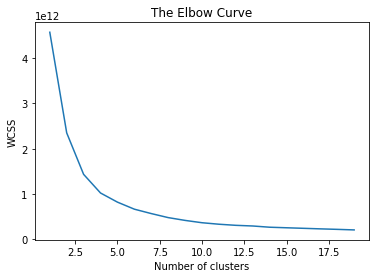

In [ ]:
# Plotting an Elbow curve for the same

def elbow_curve(sample = sample):
    wcss = []
    for i in range(1,20):
      kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
      kmeans.fit(sample)
      wcss.append(kmeans.inertia_)
      print('Cluster', i, 'Inertia', kmeans.inertia_)
    plt.plot(range(1,20),wcss)
    plt.title('The Elbow Curve')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
    plt.show()

elbow_curve()

In [ ]:
# Shuffling and importing vectors containing 1000 data points
data = data.sample(n = 1000)

In [ ]:
data['TMD2_1']

In [ ]:
# Unsupervised ML Model -- Extracts features on its own

In [ ]:
# Naive Bayes Model

In [ ]:
# RandomForestClassifier
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.25, 
                                                        random_state = 101)
    start_time = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start_time)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [ ]:
#SVR Model

def svr(x,y,parameters):
        print ('Running SVR model')
        models=[]
        test_accs=[]
        test_f1s=[]
        for tr_index, ts_index in StratifiedKFold(n_splits=4, shuffle=True, random_state=42).split(x,y):
            print ('\n\nNew Outer CV\n\n')
            grid = GridSearchCV(SVR(), param_grid=parameters, verbose=100,
                            n_jobs=4, scoring=['neg_mean_squared_error'],refit='neg_mean_squared_error')
            grid.fit(x[tr_index], y[tr_index])
            best_model = grid.best_estimator_
            best_model_preds = best_model.predict(x[ts_index])
            test_acc = mean_squared_error(y[ts_index],best_model_preds)
            models.append(best_model)
            test_accs.append(test_acc)
        best_test_acc = min(test_accs)
        best_test_model = models[test_accs.index(best_test_acc)]
        print ("\n\n Nested CV Results: {0} {1}\n\n".format(np.mean(test_accs), np.std(test_accs)))
        return best_test_model


In [ ]:
# Gaussian Process
def GaussianProcess(x,y,parameters=None):
		cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
		scores=cross_val_score(GaussianProcessClassifier(1.0 * RBF(1.0)), x, y, cv=cv, n_jobs=5, verbose=100)
		model=GaussianProcessClassifier(1.0 * RBF(1.0)).fit(x,y)
		return model


In [ ]:
# Naive Bayes Model
def naiveBayes(x,y,parameters=None):
	cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
	scores=cross_val_score(GaussianNB(), x, y, cv=cv, n_jobs=4, verbose=100,
				scoring='accuracy')
	model=GaussianNB().fit(x,y)
	return model

In [ ]:
def svm(x,y,parameters):
	print ("Running SVM model")
	#C_range = np.logspace(-2, 10, 13)
	#gamma_range = np.logspace(-9, 3, 13)
	#param_grid = dict(gamma=gamma_range, C=C_range)
	models=[]
	test_accs=[]
	test_f1s=[]
	for tr_index, ts_index in StratifiedKFold(n_splits=4, shuffle=True, random_state=42).split(x,y):
		print ("\n\nNew Outer CV\n\n")	
	#outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
		grid = GridSearchCV(SVC(probability=True), param_grid=parameters, verbose=100, 
				n_jobs=4, scoring=['f1_weighted','accuracy'],refit='f1_weighted')
		grid.fit(x[tr_index], y[tr_index])
		best_model = grid.best_estimator_
		best_model_preds = best_model.predict(x[ts_index])
		test_acc = accuracy_score(y[ts_index],best_model_preds)
		test_f1 = f1_score(y[ts_index], best_model_preds, average="weighted")	
		models.append(best_model)
		test_accs.append(test_acc)
		test_f1s.append(test_f1)	
	#non_nested_score=grid.best_score_
	#nested_score = cross_val_score(grid, X=x, y=y, cv=outer_cv)
	#print "Non-nested - Nested: " + str(non_nested_score - nested_score.mean())
	best_test_acc = max(test_accs)
	best_test_model = models[test_accs.index(best_test_acc)]
	print (f'\n\n Nested CV Results: {0} {1} {2} {3}\n\n').format(np.mean(test_accs), np.std(test_accs), np.mean(test_f1s), np.std(test_f1s))
	return best_test_model

In [ ]:
svm(ar,labels, {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']})

Running SVM model


New Outer CV


Fitting 5 folds for each of 25 candidates, totalling 125 fits


New Outer CV


Fitting 5 folds for each of 25 candidates, totalling 125 fits


New Outer CV


Fitting 5 folds for each of 25 candidates, totalling 125 fits


New Outer CV


Fitting 5 folds for each of 25 candidates, totalling 125 fits


 Nested CV Results: {0} {1} {2} {3}




AttributeError: ignored